## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [100]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score,roc_curve
from imblearn import over_sampling
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.svm import SVC

## Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Here we will observe the distribution of our classes

In [4]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print("Normal Share:",normal_share)
print("Fraud Share:",fraud_share)

Normal Share: 99.82725143693798
Fraud Share: 0.1727485630620034


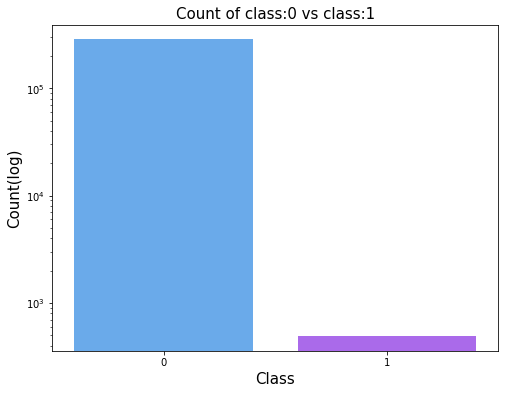

In [5]:
# Create a bar plot for the count of cloass 1 and class 0

plt.figure(figsize=(8,6))
plt.title("Count of class:0 vs class:1",fontsize=15)
sns.countplot(x=df['Class'],data=df,palette='cool',orient='v')
plt.yscale('log')
plt.ylabel("Count(log)",fontsize=15)
plt.xlabel("Class",fontsize=15)
plt.show()

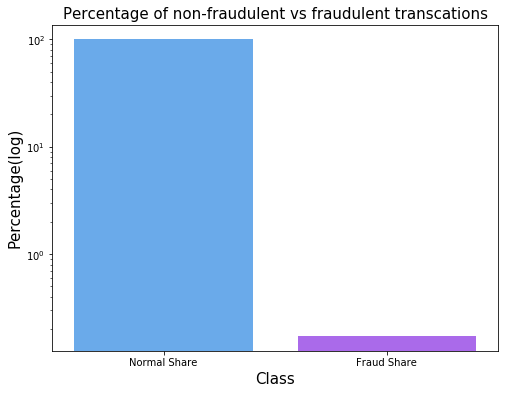

In [6]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(8,6))
plt.title("Percentage of non-fraudulent vs fraudulent transcations",fontsize=15)
sns.barplot(x=["Normal Share","Fraud Share"], y=[normal_share,fraud_share],palette='cool')
plt.yscale('log')
plt.ylabel("Percentage(log)",fontsize=15)
plt.xlabel("Class",fontsize=15)
plt.show()

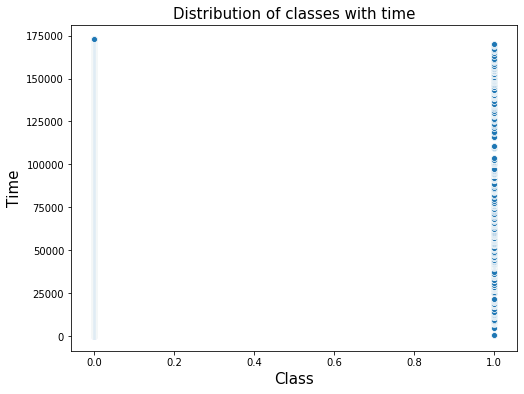

In [7]:
# Create a scatter plot to observe the distribution of classes with time

plt.figure(figsize=(8,6))
plt.title("Distribution of classes with time",fontsize=15)
sns.scatterplot(x=df['Class'], y=df['Time'],data=df,palette='cool')
#plt.yscale('log')
plt.ylabel("Time",fontsize=15)
plt.xlabel("Class",fontsize=15)
plt.show()

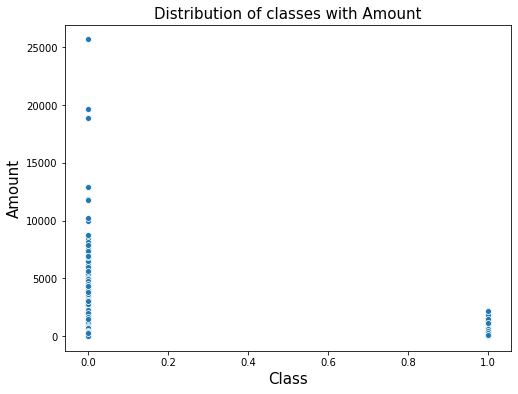

In [8]:
# Create a scatter plot to observe the distribution of classes with Amount

plt.figure(figsize=(8,6))
plt.title("Distribution of classes with Amount",fontsize=15)
sns.scatterplot(x=df['Class'], y=df['Amount'],data=df,palette='cool')
plt.ylabel("Amount",fontsize=15)
plt.xlabel("Class",fontsize=15)
plt.show()

In [9]:
# Drop unnecessary columns

# Dropping the last 6 PCA Components as they explained very least amount of variance

columns = ['V23','V24','V25','V26','V27','V28']

df = df.drop(columns,axis=1)

df.shape

(284807, 25)

### Splitting the data into train & test data

In [10]:
y= df['Class'] #class variable

X = df.drop('Class',axis=1)

In [11]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,train_size=0.7,test_size=0.3,shuffle= True,random_state = 40)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [12]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
354
138


### Plotting the distribution of a variable

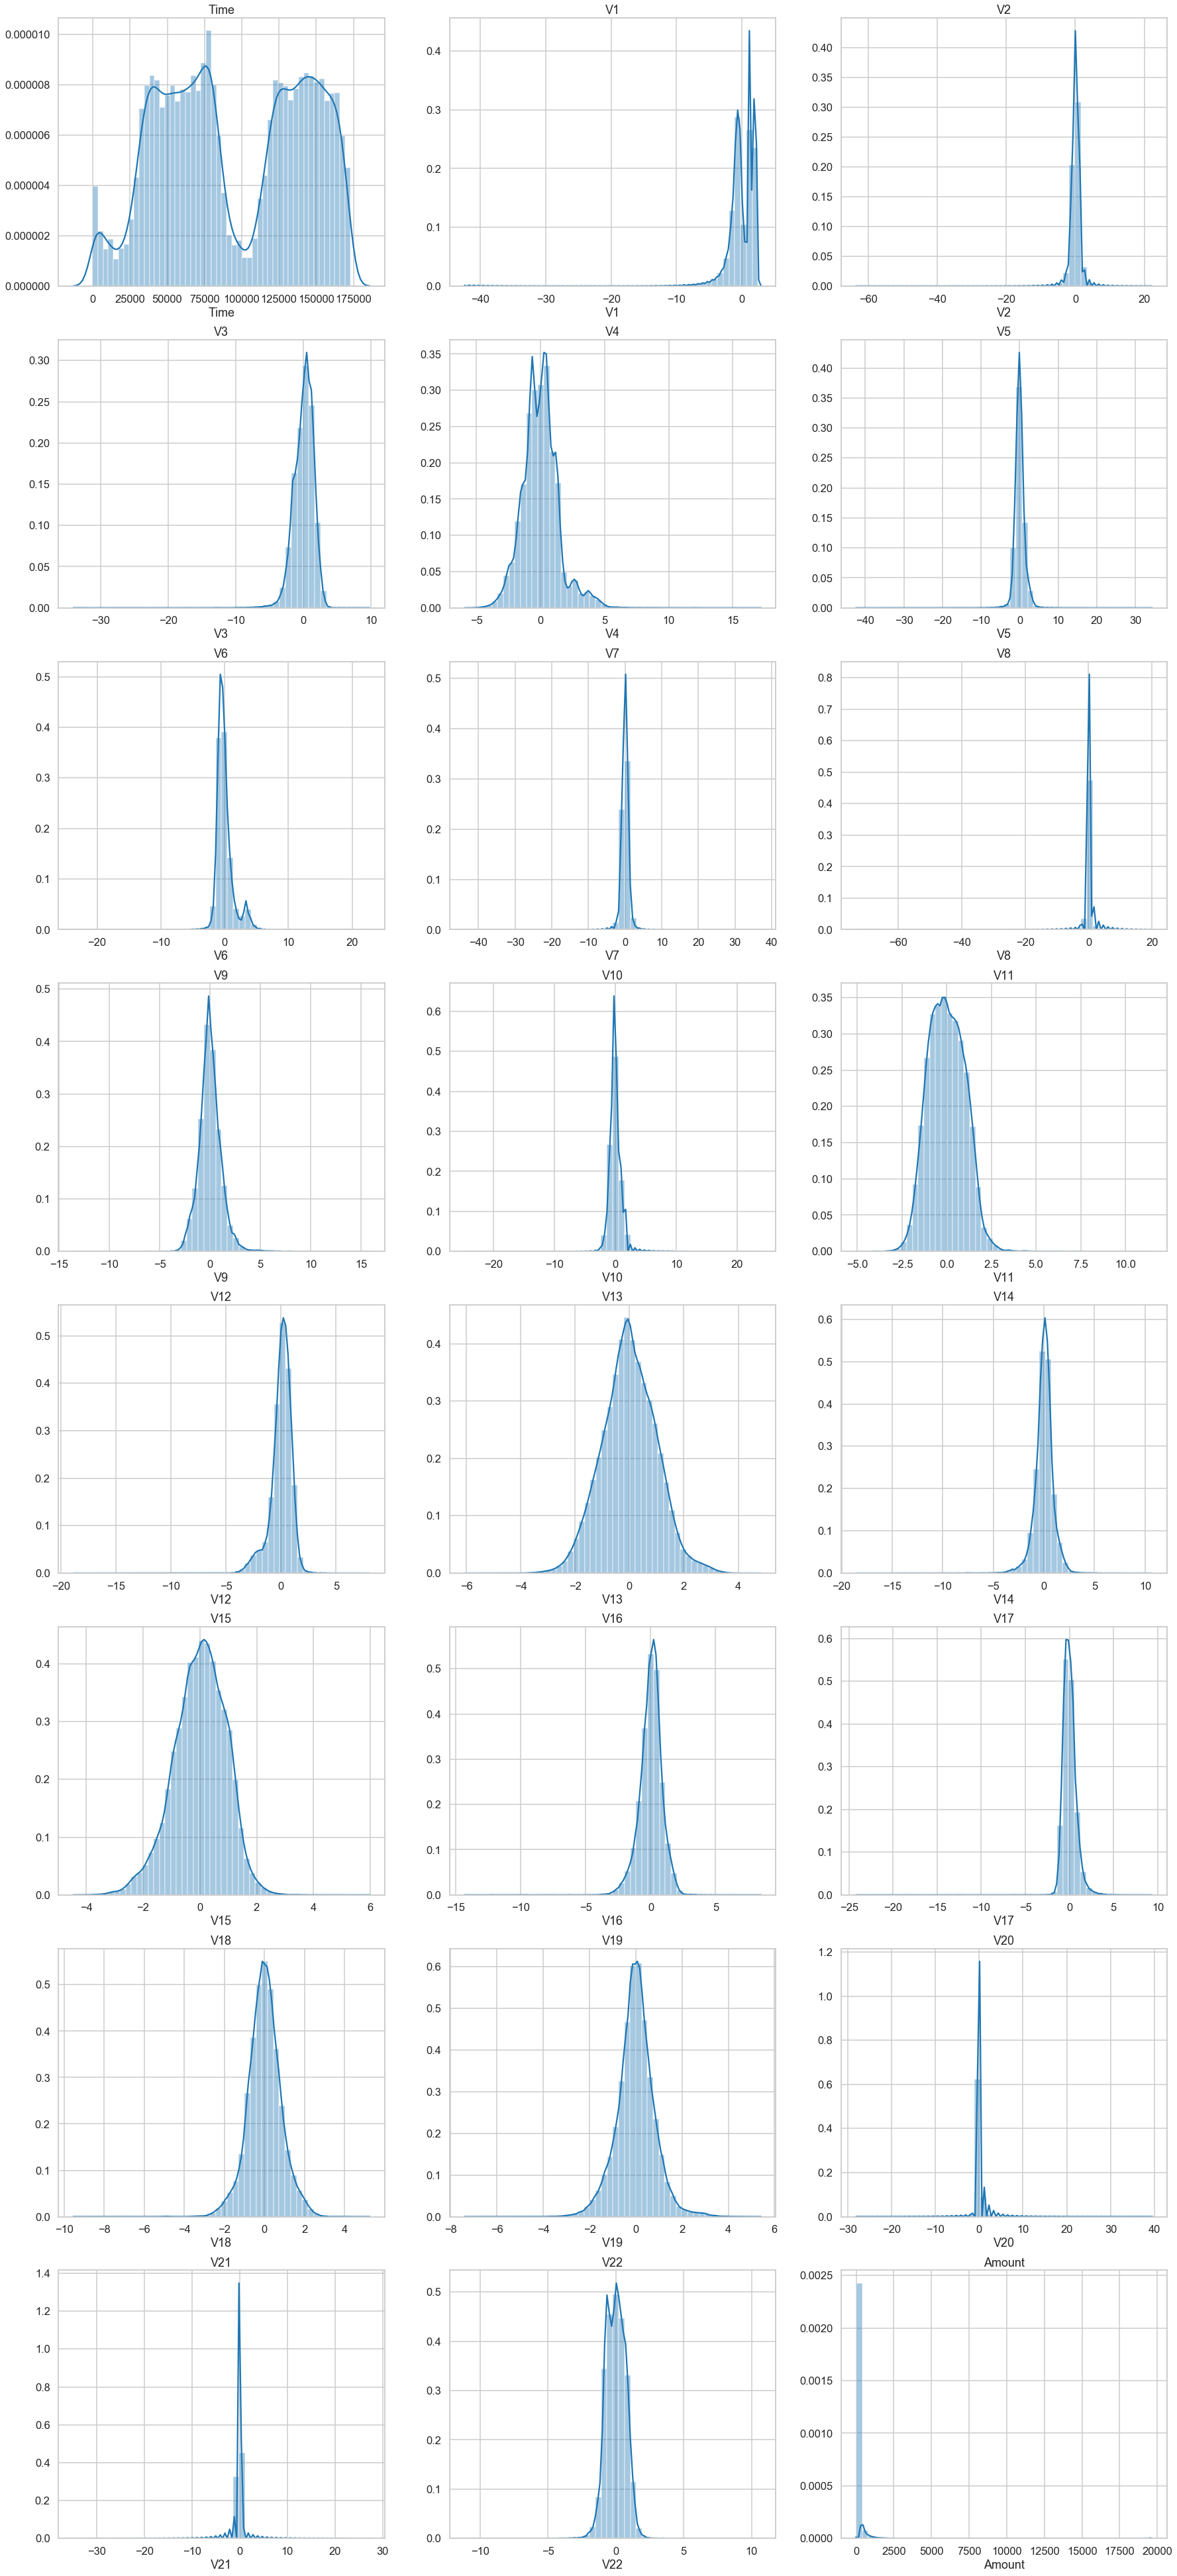

In [13]:
# plot the histogram of a variable from the dataset to see the skewness

# Setting size of figure, context and gridlines

plt.figure(figsize=(30,70))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

for i,j in enumerate(X_train.columns):    # For train set
    plt.subplot(8,3,i+1)
    plt.title(X_train.columns[i])
    sns.distplot(X_train[j])
    




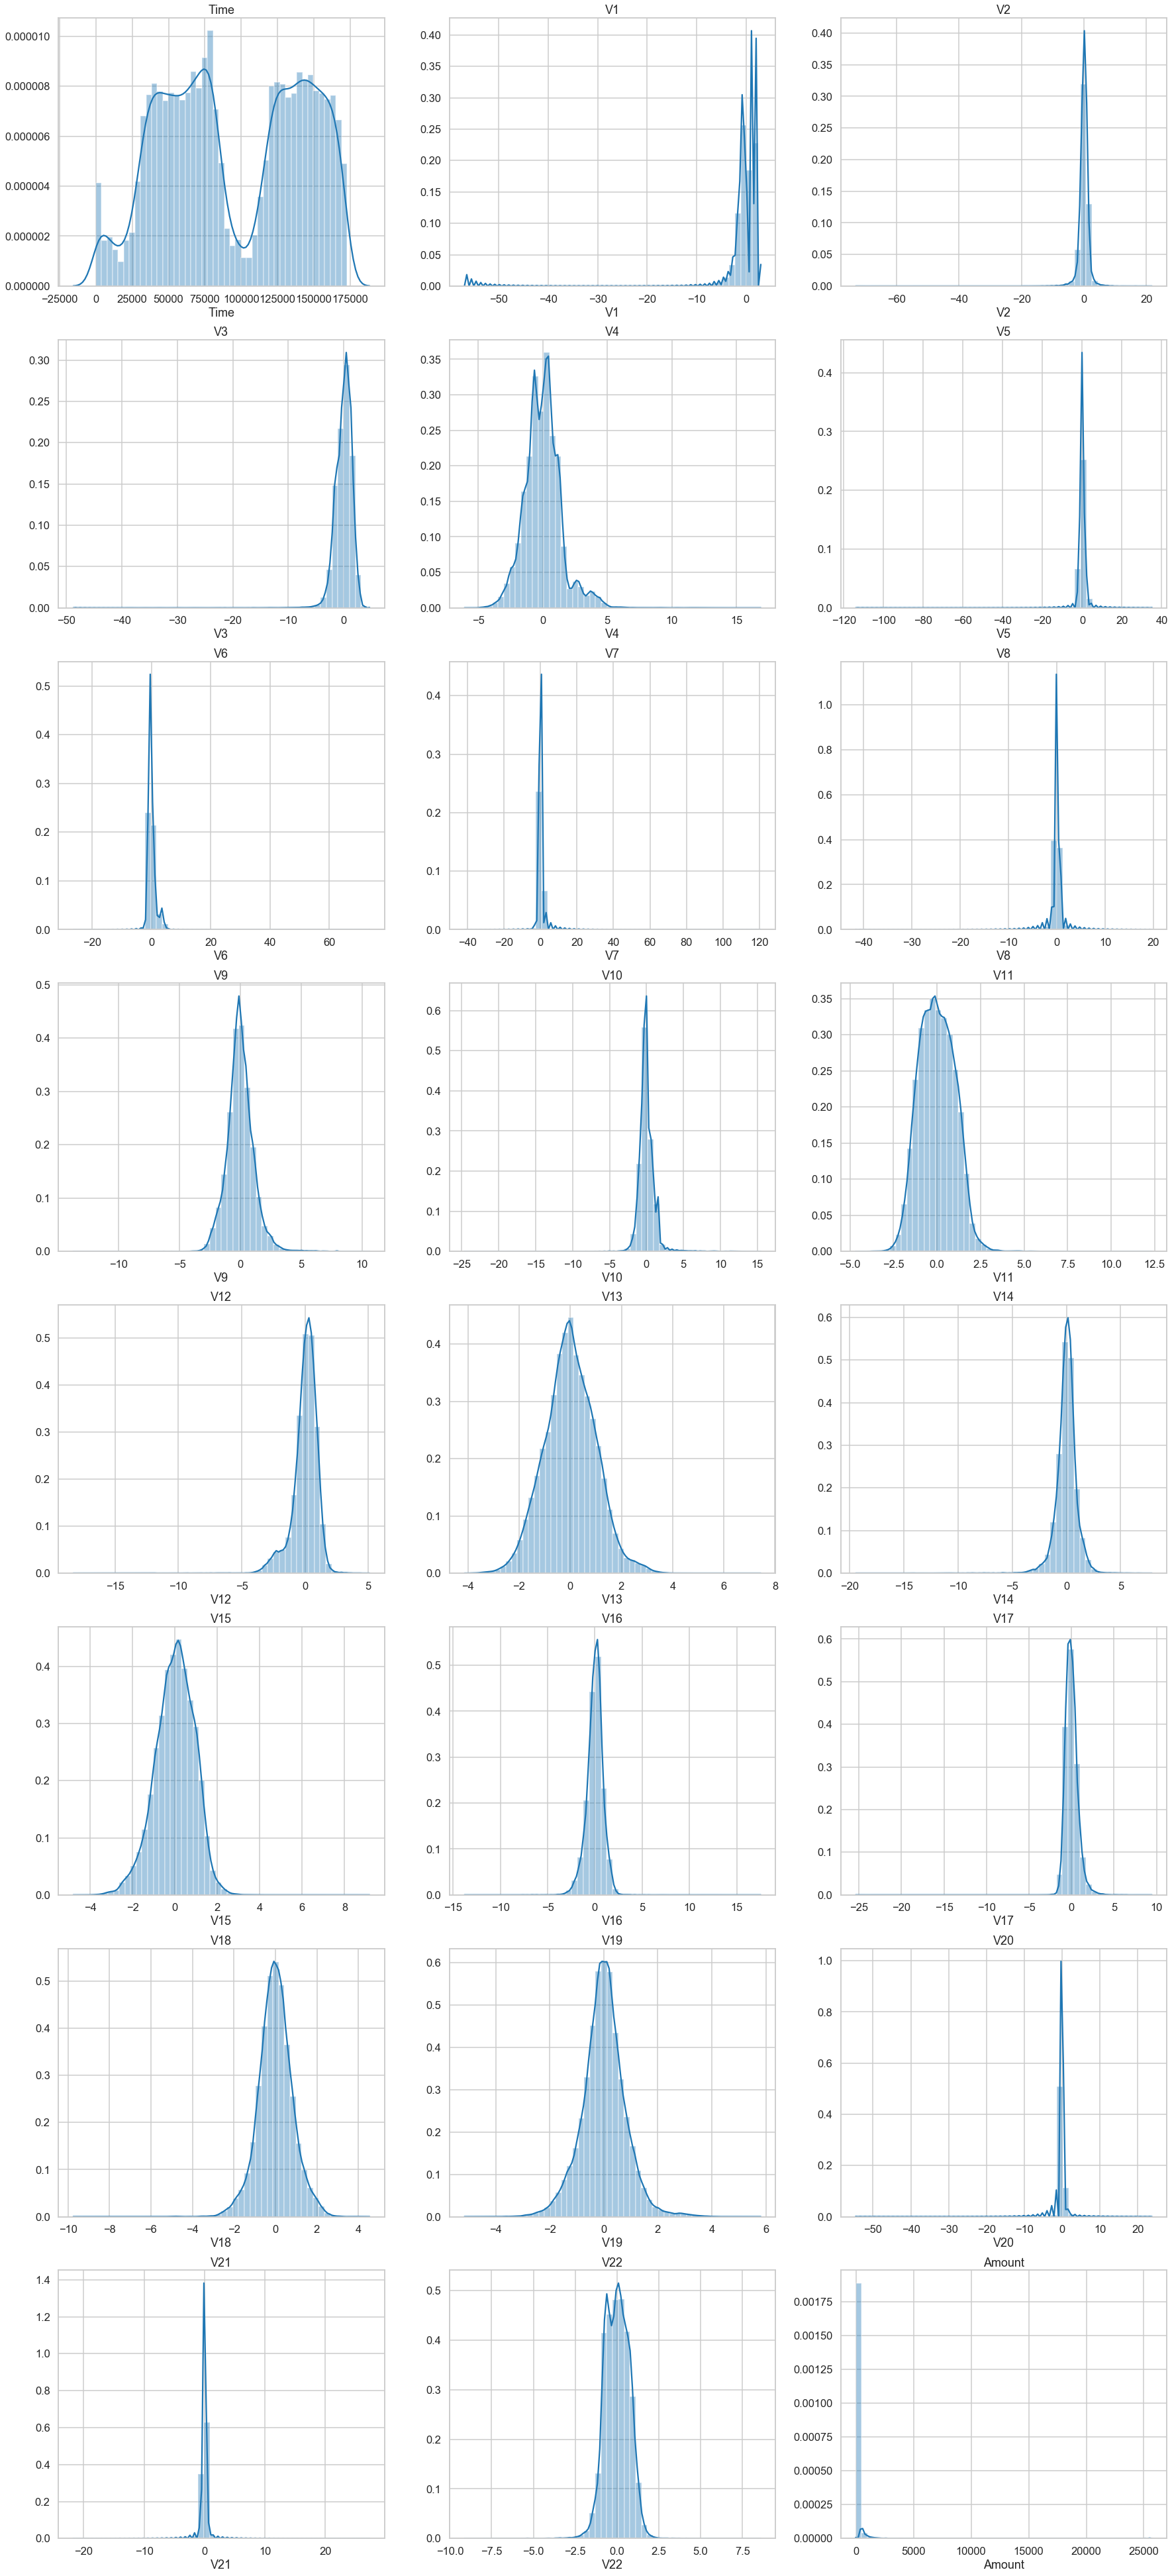

In [14]:
# plot the histogram of a variable from the dataset to see the skewness

# Setting size of figure, context and gridlines

plt.figure(figsize=(30,70))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

for i,j in enumerate(X_test.columns):   # For Test set
    plt.subplot(8,3,i+1)
    plt.title(X_test.columns[i])
    sns.distplot(X_test[j])
    




### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

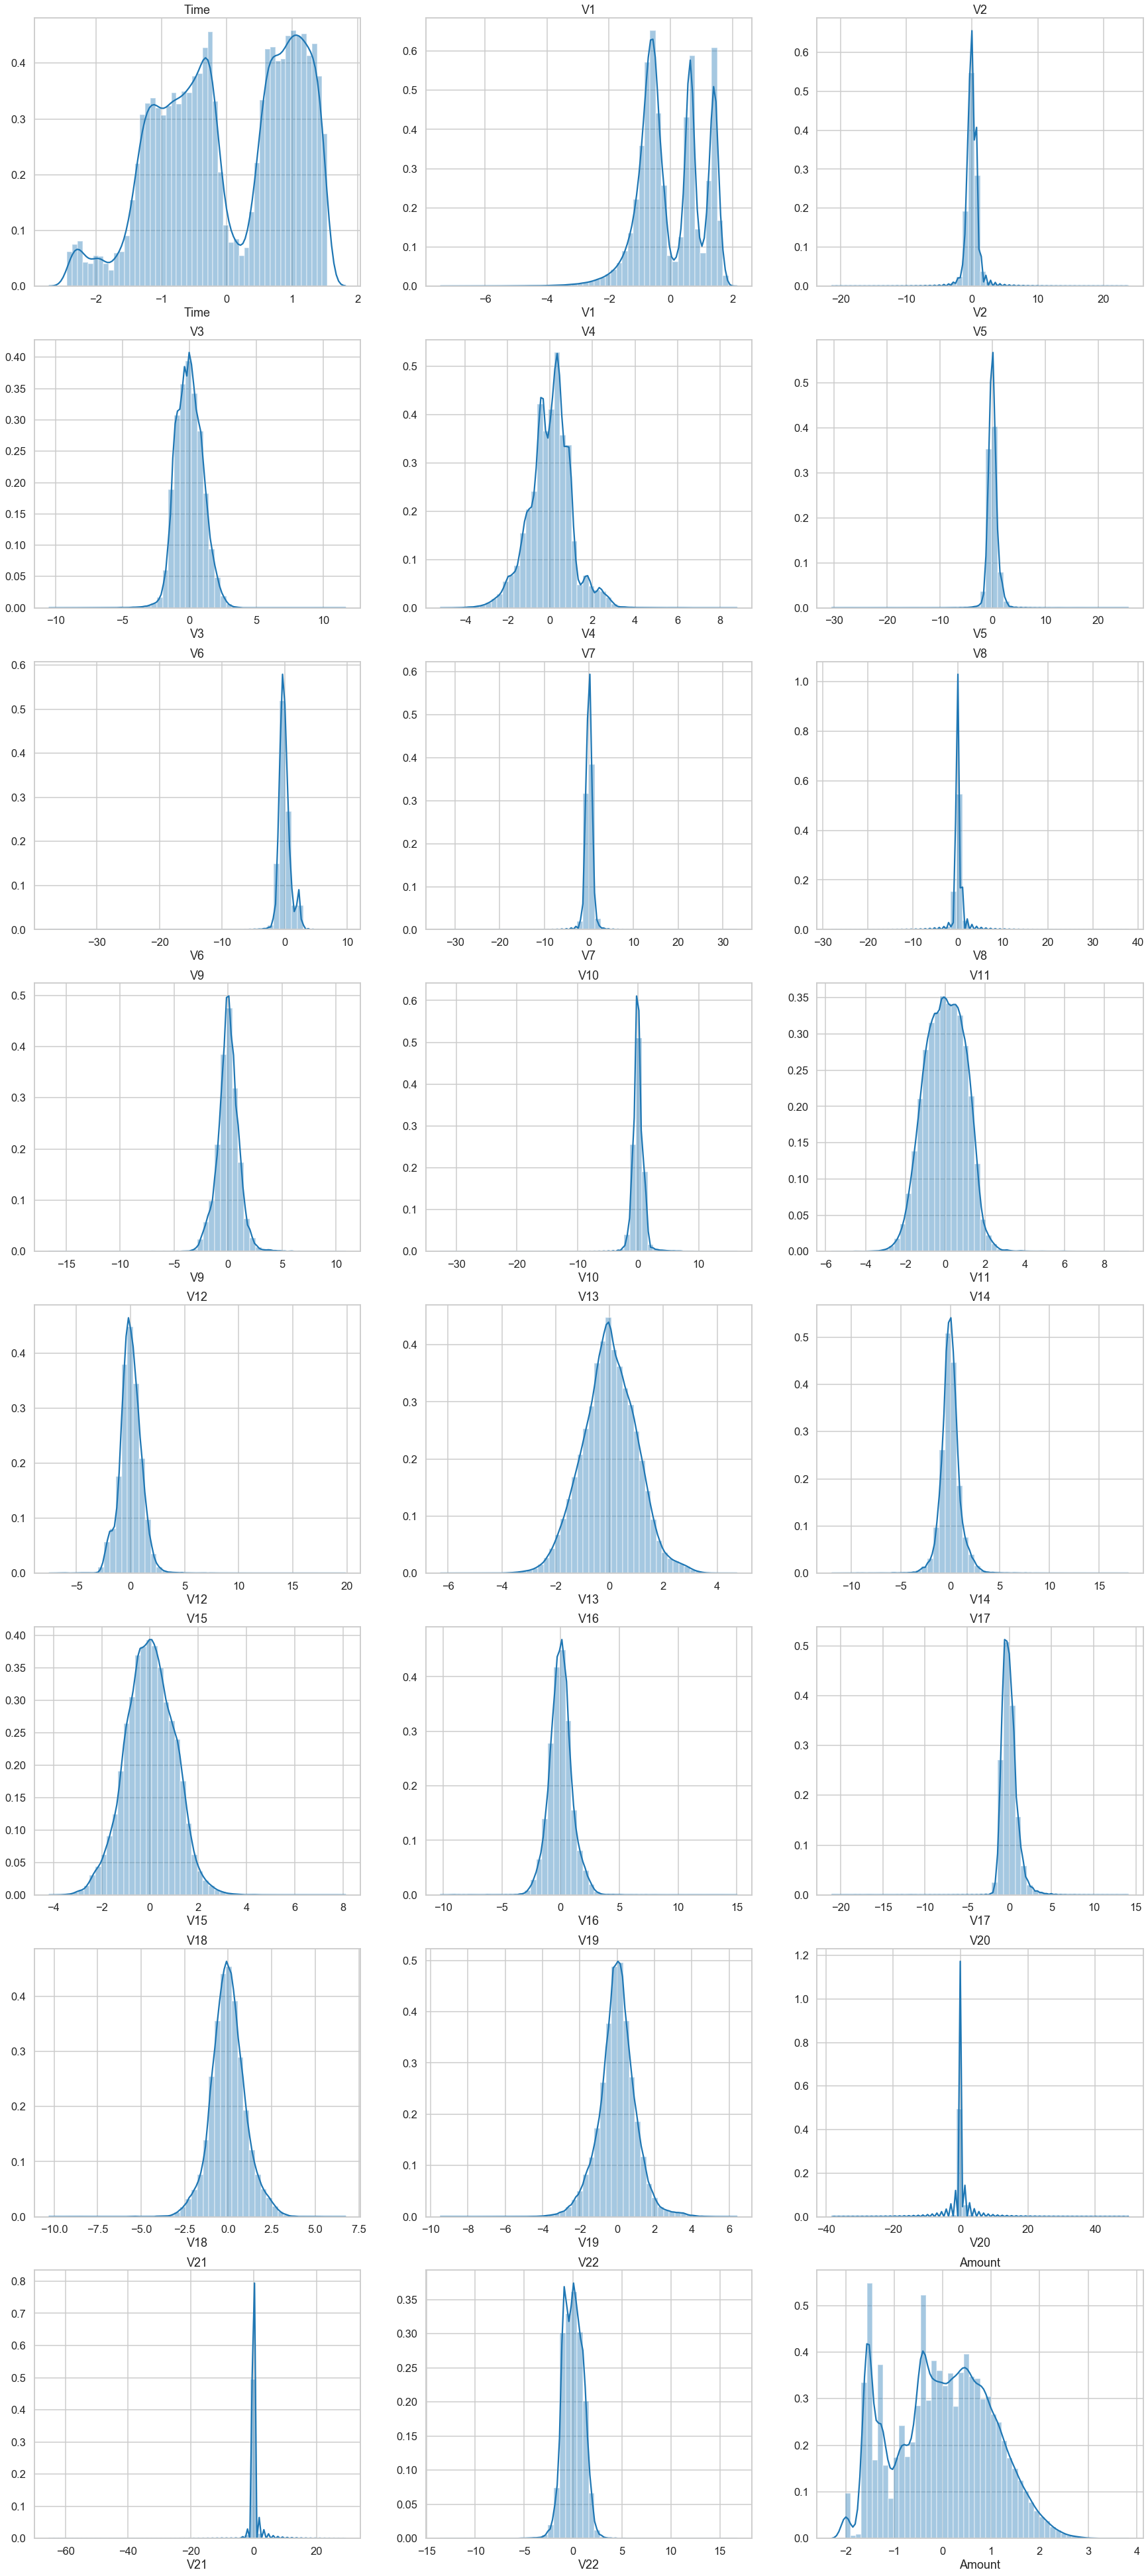

In [15]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data


# 1. For train set

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

pt.fit(X_train)

X_train_pt = pd.DataFrame(pt.transform(X_train),columns=X_train.columns)

# plot the histogram of a variable from the dataset again to see the result 

# plot the histogram of a variable from the dataset to see the skewness

# Setting size of figure, context and gridlines

plt.figure(figsize=(30,70))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

for i,j in enumerate(X_train_pt.columns):    # For train set
    plt.subplot(8,3,i+1)
    plt.title(X_train_pt.columns[i])
    sns.distplot(X_train_pt[j])
    





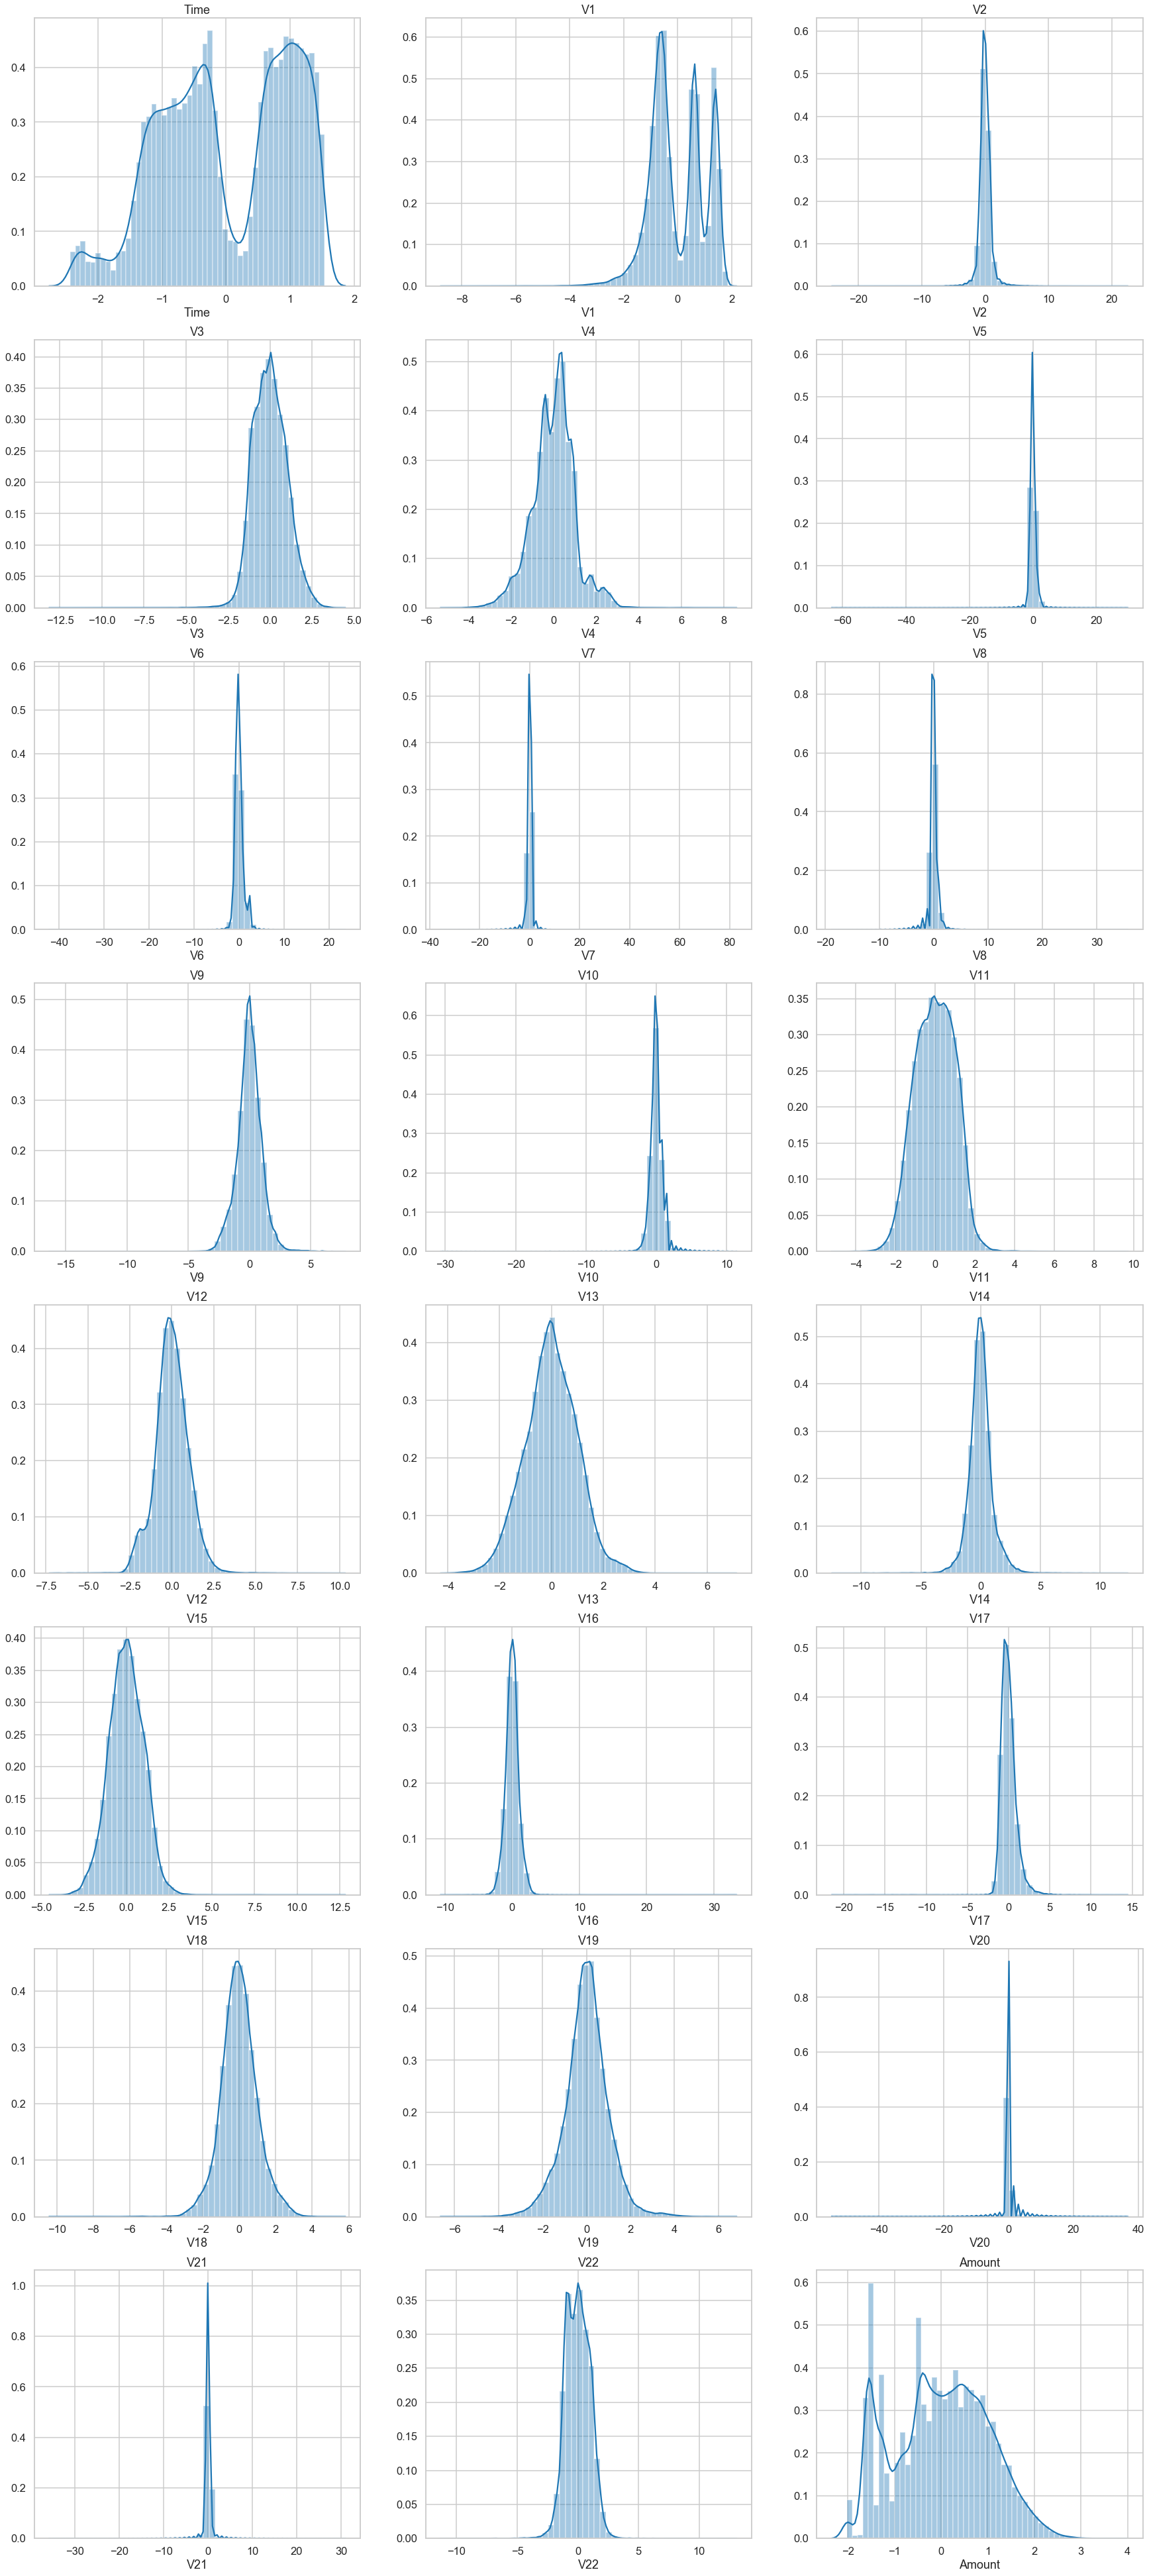

In [16]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data


# 2. For test set

from sklearn.preprocessing import PowerTransformer

pt2 = PowerTransformer()

pt2.fit(X_test)

X_test_pt = pd.DataFrame(pt2.transform(X_test),columns=X_test.columns)

# plot the histogram of a variable from the dataset again to see the result 

# plot the histogram of a variable from the dataset to see the skewness

# Setting size of figure, context and gridlines

plt.figure(figsize=(30,70))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

for i,j in enumerate(X_test_pt.columns):    # For test set
    plt.subplot(8,3,i+1)
    plt.title(X_test_pt.columns[i])
    sns.distplot(X_test_pt[j])
    





## Model Building
- Build different models on the imbalanced dataset and see the result

In [17]:
# Logistic Regression
from sklearn import linear_model #import the package

imbalance_lm = linear_model.LogisticRegression()

imbalance_lm.fit(X_train_pt,y_train)

y_pred_lm = imbalance_lm.predict(X_test_pt)


In [18]:
# Evaluation

print("Accuracy:",accuracy_score(y_test,y_pred_lm))
print("Recall:",recall_score(y_test,y_pred_lm))
print("Precision:",precision_score(y_test,y_pred_lm))
print("F1:",f1_score(y_test,y_pred_lm))
print("ROC_AUC_SCORE:",roc_auc_score(y_test,y_pred_lm))

Accuracy: 0.9992743700478681
Recall: 0.6376811594202898
Precision: 0.88
F1: 0.7394957983193275
ROC_AUC_SCORE: 0.8187702438564435


#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [37]:
#perform cross validation

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

In [19]:
# Performing ross validation 

kf = KFold(n_splits=5, shuffle=True, random_state=40) 
kf.get_n_splits(X_train_pt)

for train_index, test_index in kf.split(X_train_pt):
    X_train_cv, X_test_cv = X_train_pt.iloc[train_index], X_train_pt.iloc[test_index] 
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

In [38]:
#List Hyperparameters that we want to tune

#Convert to dictionary
grid_params = {'n_neighbors':list(range(3,9,2))}
#Create new KNN object
knn = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn, grid_params, cv=5,verbose = 1)

In [39]:
#Fit the model
clf_model = clf.fit(X_train_cv,y_train_cv)

#Print The value of best Hyperparameters

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 109.8min finished


In [40]:
clf_model.best_params_   # Best parameters

{'n_neighbors': 3}

In [32]:
# KNN classfier

knn1 = KNeighborsClassifier(n_neighbors = 3)

knn_model = knn1.fit(X_train_cv,y_train_cv)

y_predict1 = knn1.predict(X_test_cv)


# Evalaution

print("Accuracy:",accuracy_score(y_test_cv,y_predict1))
print("Recall:",recall_score(y_test_cv,y_predict1))
print("Precision:",precision_score(y_test_cv,y_predict1))
print("F1:",f1_score(y_test_cv,y_predict1))
print("ROC_AUC_SCORE:",roc_auc_score(y_test_cv,y_predict1))

Accuracy: 0.9996237961476726
Recall: 0.8169014084507042
Precision: 0.9666666666666667
F1: 0.8854961832061069
ROC_AUC_SCORE: 0.9084255792284928


In [22]:
# Random Forest Classifier

rfc=RandomForestClassifier(random_state=50)  # Initialising our object

n_folds=KFold(n_splits=5,shuffle=True,random_state=50)   # Setting number of folds equal to 5

# Passing parameters for tuning

parameters={'criterion':['gini','entropy'],
           'max_depth': range(10,200,50)}

# Creating a model using Gridsearch CV

model_cv= GridSearchCV(estimator=rfc,param_grid=parameters,cv=n_folds,verbose=1,
                      return_train_score=True,scoring='recall')

In [23]:
#Fit the model
model_cv = model_cv.fit(X_train_cv,y_train_cv)

#Print The value of best Hyperparameters

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 212.4min finished


In [24]:
model_cv.best_params_   # Best parameters

{'criterion': 'entropy', 'max_depth': 60}

In [30]:
# Final model for Random Forest

rfc_final = RandomForestClassifier(criterion= 'entropy', max_depth= 60, random_state=40)

rfc_model = rfc_final.fit(X_train_cv,y_train_cv)

y_rfc_predict = rfc_final.predict(X_test_cv)

# Evaluation

print("Accuracy:",accuracy_score(y_test_cv,y_rfc_predict))
print("Recall:",recall_score(y_test_cv,y_rfc_predict))
print("Precision:",precision_score(y_test_cv,y_rfc_predict))
print("F1:",f1_score(y_test_cv,y_rfc_predict))
print("ROC_AUC_SCORE:",roc_auc_score(y_test_cv,y_rfc_predict))

Accuracy: 0.9995736356340289
Recall: 0.8028169014084507
Precision: 0.95
F1: 0.8702290076335878
ROC_AUC_SCORE: 0.9013707632089364


In [22]:
# Grid serach CV for SVC

params = {"C": [0.1, 1, 10, 100, 1000]}

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

model = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True)  

model_cv.fit(X_train_cv, y_train_cv) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 84.9min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring='accuracy',
             verbose=1)

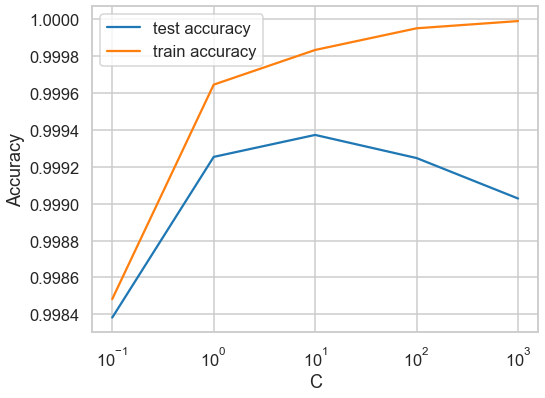

In [23]:
# plot of C versus train and test scores

cv_results = pd.DataFrame(model_cv.cv_results_)
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [24]:
# Finding the best score

best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.999373010680296 at C = 10


In [25]:
# model with the best value of C
model = SVC(C=best_C)

# fit
model.fit(X_train_cv, y_train_cv)

# predict
y_pred = model.predict(X_test_cv)

In [28]:
# Evalaution for SVC

print("Accuracy:",accuracy_score(y_test_cv,y_pred))
print("Recall:",recall_score(y_test_cv,y_pred))
print("Precision:",precision_score(y_test_cv,y_pred))
print("F1:",f1_score(y_test_cv,y_pred))
print("ROC_AUC_SCORE:",roc_auc_score(y_test_cv,y_pred))

Accuracy: 0.9993980738362761
Recall: 0.704225352112676
Precision: 0.9433962264150944
F1: 0.8064516129032259
ROC_AUC_SCORE: 0.852074988561049


In [30]:
# Grid serach CV for XGB classifier

xgb = XGBClassifier()

params = {'max_depth':range(4,10,2),'min_child_weight':range(2,6,2),'learning_rate':[0.01,0.02,0.1,0.2,0.5,0.6]}
gsearch = GridSearchCV(estimator = xgb,param_grid = params, scoring='roc_auc',cv=folds,verbose = 1,return_train_score=True)

gsearch.fit(X_train_cv, y_train_cv) 


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 435.5min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.02, 0.1, 0.2, 0.5, 0.6],
                         'max_depth': rang

In [31]:
gsearch.best_params_  # Best Parameters

{'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 4}

In [33]:
# FInal model for XGB classifier with best hyperparameters

xgb_final = XGBClassifier(learning_rate= 0.1, max_depth = 4, min_child_weight= 4)

xgb_final.fit(X_train_cv, y_train_cv)

xgb_predict = xgb_final.predict(X_test_cv)

print("Accuracy:",accuracy_score(y_test_cv,xgb_predict))
print("Recall:",recall_score(y_test_cv,xgb_predict))
print("Precision:",precision_score(y_test_cv,xgb_predict))
print("F1:",f1_score(y_test_cv,xgb_predict))
print("ROC_AUC_SCORE:",roc_auc_score(y_test_cv,xgb_predict))

Accuracy: 0.9995485553772071
Recall: 0.8028169014084507
Precision: 0.9344262295081968
F1: 0.8636363636363635
ROC_AUC_SCORE: 0.9013582007105065


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [26]:
# Best model(XGB)

clf = XGBClassifier(learning_rate= 0.1, max_depth = 4, min_child_weight= 4) #initialise the model with optimum hyperparameters
clf.fit(X_train_pt, y_train)

xgb_final_predict = clf.predict(X_test_pt)

xgb_predict_proba = clf.predict_proba(X_test_pt)

#print the evaluation score on the X_test by choosing the best evaluation metric

print("F1:",f1_score(y_test,xgb_final_predict))
print("ROC_AUC_SCORE:",roc_auc_score(y_test,xgb_final_predict))

F1: 0.8769230769230769
ROC_AUC_SCORE: 0.9129965876917354


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 18
2nd Top var = 15
3rd Top var = 11


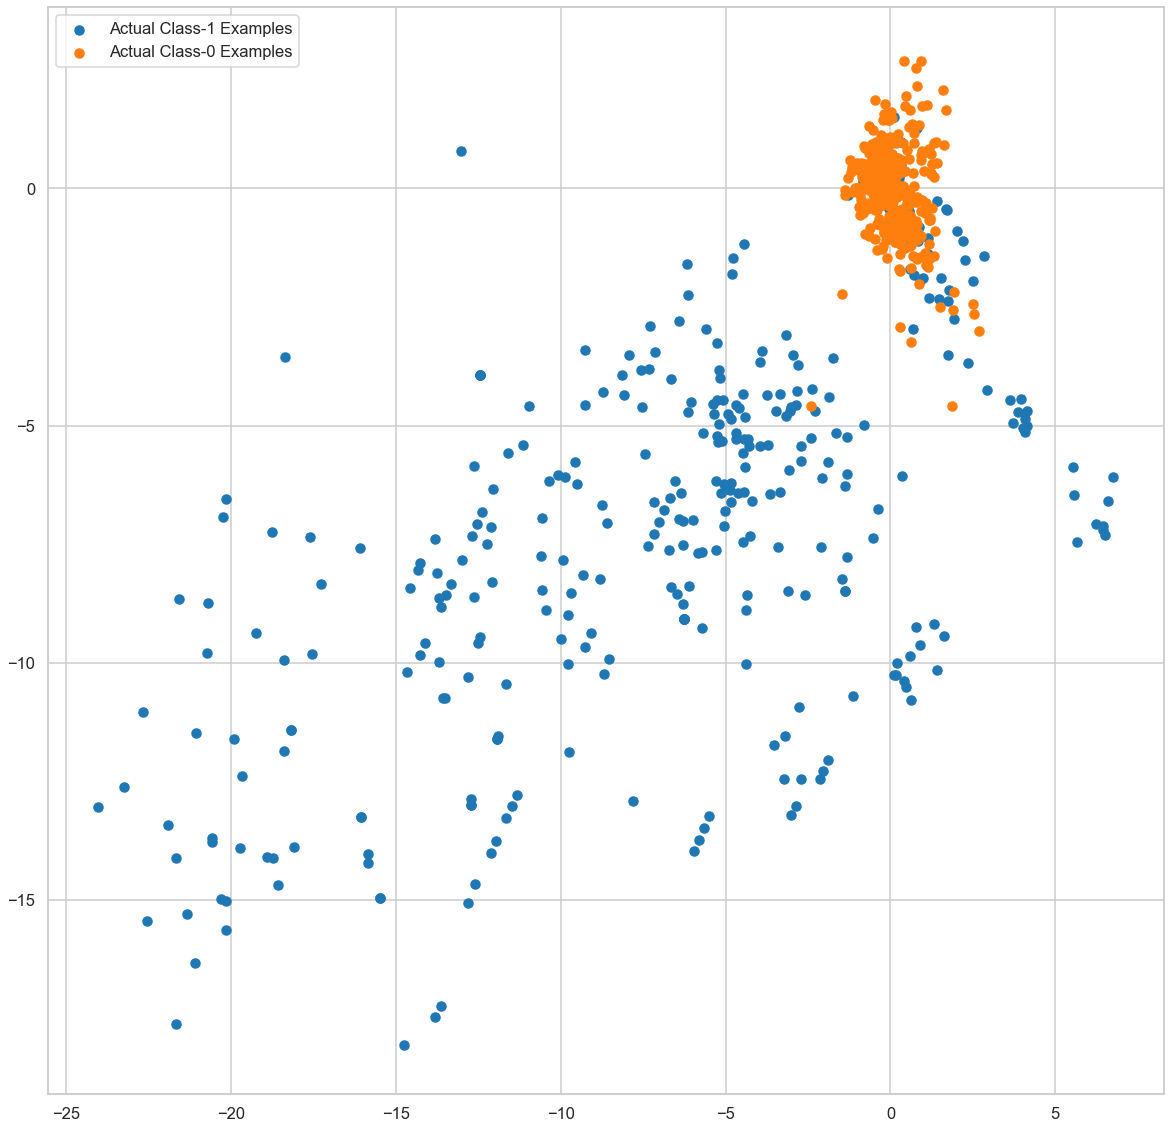

In [25]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [20]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


# Oversampling


ros = over_sampling.RandomOverSampler(random_state=40)
X_resampled, y_resampled = ros.fit_resample(X_train_cv, y_train_cv)


pd.DataFrame(y_resampled,columns=['Class']).Class.value_counts()

1    159209
0    159209
Name: Class, dtype: int64

In [21]:
# Logistic Regression

lm_balanced = linear_model.LogisticRegression()

lm_balanced.fit(X_resampled,y_resampled)

y_pred_lm_balanced = lm_balanced.predict(X_test_cv)

# Evalaution

print("Accuracy:",accuracy_score(y_test_cv,y_pred_lm_balanced))
print("Recall:",recall_score(y_test_cv,y_pred_lm_balanced))
print("Precision:",precision_score(y_test_cv,y_pred_lm_balanced))
print("F1:",f1_score(y_test_cv,y_pred_lm_balanced))
print("ROC_AUC_SCORE:",roc_auc_score(y_test_cv,y_pred_lm_balanced))

Accuracy: 0.9723113964686998
Recall: 0.9154929577464789
Precision: 0.05588993981083405
F1: 0.10534846029173421
ROC_AUC_SCORE: 0.9439528555974424


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [52]:
# Grid sraech CV for KNN algorithim

grid_params = {'n_neighbors':[3,5]}
#Create new KNN object
knn_resample = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_resample, grid_params, cv=5,verbose = 1)

In [53]:
clf_model = clf.fit(X_resampled,y_resampled)  # Fitting the KNN model

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 65.1min finished


In [54]:
clf_model.best_params_  # Best Params

{'n_neighbors': 3}

In [59]:
# Final KNN model using best hyperparameters 

knn2 = KNeighborsClassifier(n_neighbors = 3)

knn_model = knn2.fit(X_resampled,y_resampled)

y_knnpredict = knn2.predict(X_test_cv)

# Evaluation

print("Accuracy:",accuracy_score(y_test_cv,y_knnpredict))
print("Recall:",recall_score(y_test_cv,y_knnpredict))
print("Precision:",precision_score(y_test_cv,y_knnpredict))
print("F1:",f1_score(y_test_cv,y_knnpredict))
print("ROC_AUC_SCORE:",roc_auc_score(y_test_cv,y_knnpredict))

Accuracy: 0.9992726725521669
Recall: 0.8450704225352113
Precision: 0.7692307692307693
F1: 0.8053691275167785
ROC_AUC_SCORE: 0.9223090862958713


In [60]:
# Grid serach CV using Random forest classifier

rfc1=RandomForestClassifier(random_state=50)  # Initialising our object

n_folds=KFold(n_splits=5,shuffle=True,random_state=50)   # Setting number of folds equal to 5

# Passing parameters for tuning

parameters={'criterion':['gini','entropy'],
           'max_depth': range(10,110,50)}

# Creating a model using Gridsearch CV

model_cv_rf= GridSearchCV(estimator=rfc1,param_grid=parameters,cv=n_folds,verbose=1,
                      return_train_score=True,scoring='roc_auc')

In [61]:
#Fit the model
model_rf = model_cv_rf.fit(X_resampled,y_resampled)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 97.0min finished


In [62]:
model_rf.best_params_     #Print The value of best Hyperparameters

{'criterion': 'gini', 'max_depth': 60}

In [66]:
# Final model with best hyperparameters

rfc_final_balance = RandomForestClassifier(criterion= 'gini', max_depth= 60, random_state=40)

rfc_model1 = rfc_final_balance.fit(X_resampled,y_resampled)

y_rf_pred = rfc_final_balance.predict(X_test_cv)

# Evaluation

print("Accuracy:",accuracy_score(y_test_cv,y_rf_pred))
print("Recall:",recall_score(y_test_cv,y_rf_pred))
print("Precision:",precision_score(y_test_cv,y_rf_pred))
print("F1:",f1_score(y_test_cv,y_rf_pred))
print("ROC_AUC_SCORE:",roc_auc_score(y_test_cv,y_rf_pred))

Accuracy: 0.9995485553772071
Recall: 0.7887323943661971
Precision: 0.9491525423728814
F1: 0.8615384615384616
ROC_AUC_SCORE: 0.8943285096878094


In [68]:
# XGB grid serach 

xgb_1 = XGBClassifier()

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

params = {'max_depth':range(4,8,2),'min_child_weight':range(2,6,2),'learning_rate':[0.01,0.1,0.2,0.5]}
xgb_resample = GridSearchCV(estimator = xgb_1,param_grid = params, scoring='roc_auc',cv=folds,verbose = 1,return_train_score=True)

xgb_resample.fit(X_resampled,y_resampled) 


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 401.2min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5],
                         'max_depth': range(4, 8, 2),

In [69]:
xgb_resample.best_params_  # Best parameters

{'learning_rate': 0.5, 'max_depth': 6, 'min_child_weight': 4}

In [70]:
# Final XGB model using best paramters


xgb_final1 = XGBClassifier(learning_rate= 0.5, max_depth = 6, min_child_weight= 4)

xgb_final1.fit(X_resampled,y_resampled)

xgb_predict1 = xgb_final1.predict(X_test_cv)

# Evaluation

print("Accuracy:",accuracy_score(y_test_cv,xgb_predict1))
print("Recall:",recall_score(y_test_cv,xgb_predict1))
print("Precision:",precision_score(y_test_cv,xgb_predict1))
print("F1:",f1_score(y_test_cv,xgb_predict1))
print("ROC_AUC_SCORE:",roc_auc_score(y_test_cv,xgb_predict1))

Accuracy: 0.9995736356340289
Recall: 0.8309859154929577
Precision: 0.921875
F1: 0.874074074074074
ROC_AUC_SCORE: 0.9154301452543304


Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [72]:
# Model with the best result

clf = XGBClassifier(learning_rate= 0.5, max_depth = 6, min_child_weight= 4) #initialise the model with optimum hyperparameters

ros = over_sampling.RandomOverSampler(random_state=40)
X_resample, y_resample = ros.fit_resample(X_train_pt, y_train)

clf.fit(X_resample,y_resample)

y_pred_lm_balance = clf.predict(X_test_pt)


#print the evaluation score on the X_test by choosing the best evaluation metric

print("F1:",f1_score(y_test,y_pred_lm_balance))
print("ROC_AUC_SCORE:",roc_auc_score(y_test,y_pred_lm_balance))

F1: 0.8745247148288974
ROC_AUC_SCORE: 0.9166080534552489


### SMOTE

perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

perform hyperparameter tuning

print the evaluation result by choosing a evaluation metric

print the optimum value of hyperparameters

In [22]:
# SMOTE

from imblearn import over_sampling

sm = over_sampling.SMOTE(random_state=40)

X_train_smote, y_train_smote = sm.fit_resample(X_train_cv, y_train_cv)

In [31]:
# Logistic regression

lm_smote = linear_model.LogisticRegression()

lm_smote.fit(X_train_smote,y_train_smote)

y_pred_lm_smote = lm_balanced.predict(X_test_cv)

# Evaluation

print("Accuracy:",accuracy_score(y_test_cv,y_pred_lm_smote))
print("Recall:",recall_score(y_test_cv,y_pred_lm_smote))
print("Precision:",precision_score(y_test_cv,y_pred_lm_smote))
print("F1:",f1_score(y_test_cv,y_pred_lm_smote))
print("ROC_AUC_SCORE:",roc_auc_score(y_test_cv,y_pred_lm_smote))

Accuracy: 0.9723113964686998
Recall: 0.9154929577464789
Precision: 0.05588993981083405
F1: 0.10534846029173421
ROC_AUC_SCORE: 0.9439528555974424


##### Build models on other algorithms to see the better performing on SMOTE

In [41]:
# XGB grid search

xgb_1 = XGBClassifier()

folds = KFold(n_splits = 3, shuffle = True, random_state = 4)

params = {'max_depth':range(4,8,2),'min_child_weight':range(4,8,2),'learning_rate':[0.3,0.5,0.7]}
xgb_resample = GridSearchCV(estimator = xgb_1,param_grid = params, scoring='roc_auc',cv=folds,verbose = 1,return_train_score=True)

xgb_resample.fit(X_train_smote,y_train_smote) 


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 160.3min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.3, 0.5, 0.7],
                         'max_depth': range(4, 8, 2),
     

In [42]:
xgb_resample.best_params_  # Best Parameters

{'learning_rate': 0.5, 'max_depth': 6, 'min_child_weight': 4}

In [43]:
# Final model with best hyperparameters

xgb_smote = XGBClassifier(learning_rate= 0.5, max_depth = 6, min_child_weight= 4)

xgb_smote.fit(X_train_smote,y_train_smote)

xgb_smote_pred = xgb_smote.predict(X_test_cv)

# Evaluation

print("Accuracy:",accuracy_score(y_test_cv,xgb_smote_pred))
print("Recall:",recall_score(y_test_cv,xgb_smote_pred))
print("Precision:",precision_score(y_test_cv,xgb_smote_pred))
print("F1:",f1_score(y_test_cv,xgb_smote_pred))
print("ROC_AUC_SCORE:",roc_auc_score(y_test_cv,xgb_smote_pred))

Accuracy: 0.9992726725521669
Recall: 0.8309859154929577
Precision: 0.7763157894736842
F1: 0.802721088435374
ROC_AUC_SCORE: 0.9152793952731741


In [24]:
# KNN Grid search classifier

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_params = {'n_neighbors':[3,5]}
#Create new KNN object
knn_smote = KNeighborsClassifier()

#Use GridSearch
knn_smote = GridSearchCV(knn_smote, grid_params, cv=3,verbose = 1)

In [25]:
model_smote = knn_smote.fit(X_train_smote,y_train_smote)  # Fitting the model

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 62.9min finished


In [26]:
# Fittign the knn model with best hyperparameters

from sklearn.neighbors import KNeighborsClassifier

knn_final_smote = KNeighborsClassifier(n_neighbors = 3)

knn_smote = knn_final_smote.fit(X_train_smote,y_train_smote)

knn_smote_pred = knn_final_smote.predict(X_test_cv)

print("Accuracy:",accuracy_score(y_test_cv,knn_smote_pred))
print("Recall:",recall_score(y_test_cv,knn_smote_pred))
print("Precision:",precision_score(y_test_cv,knn_smote_pred))
print("F1:",f1_score(y_test_cv,knn_smote_pred))
print("ROC_AUC_SCORE:",roc_auc_score(y_test_cv,knn_smote_pred))

Accuracy: 0.9983196227929374
Recall: 0.8450704225352113
Precision: 0.5172413793103449
F1: 0.641711229946524
ROC_AUC_SCORE: 0.9218317113555431


### Print the class distribution after applying SMOTE 

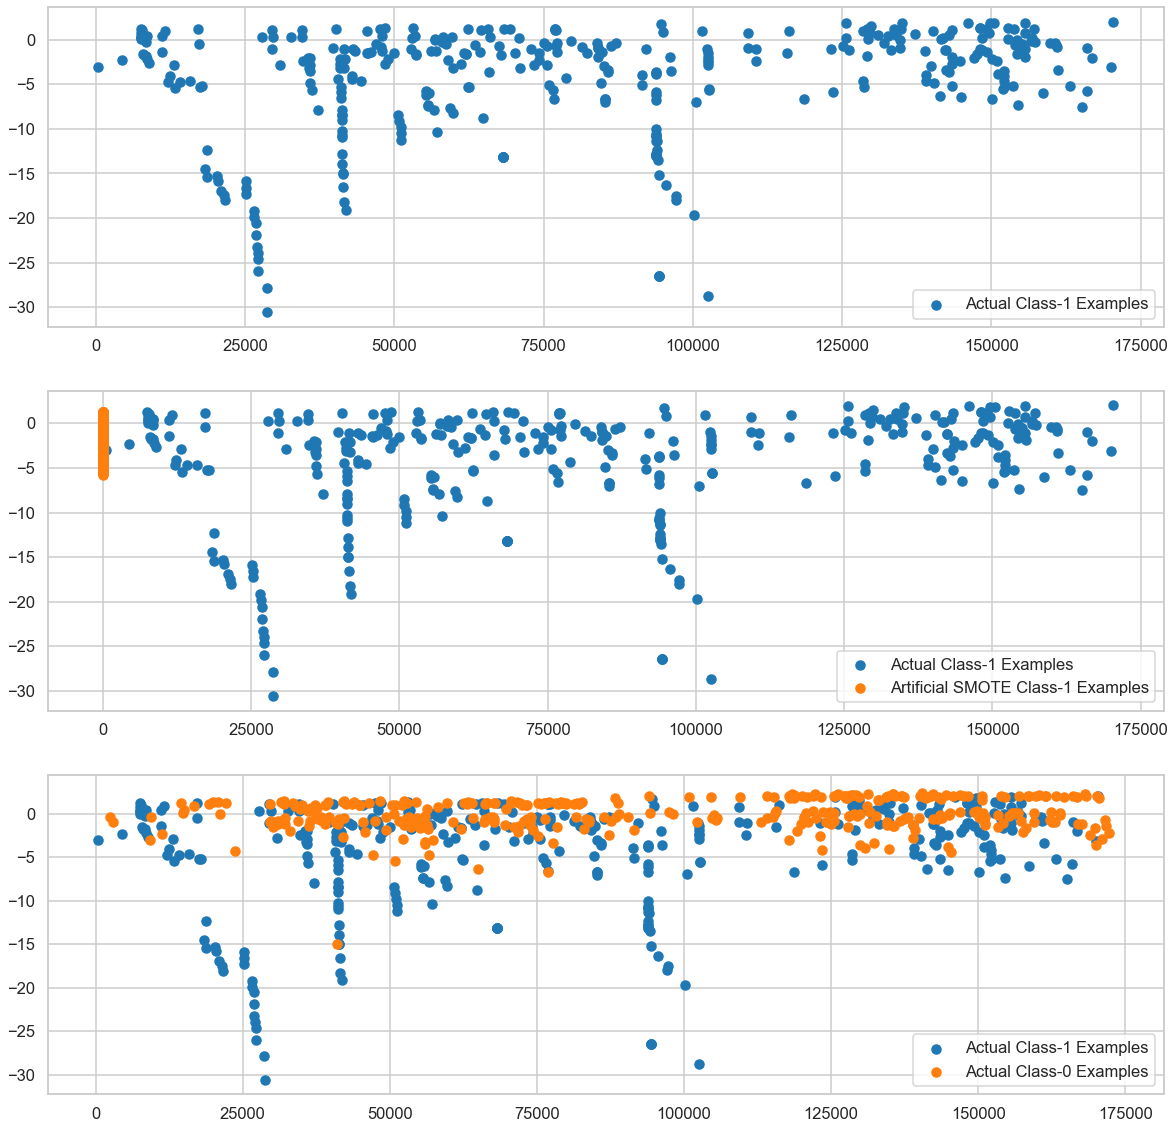

In [37]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train_pt, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [24]:
# Best SMOTE model

from imblearn import over_sampling

from xgboost.sklearn import XGBClassifier

sm = over_sampling.SMOTE(random_state=40)

X_train_smote1, y_train_smote1 = sm.fit_resample(X_train_pt, y_train)

xgb_smote1 = XGBClassifier(learning_rate= 0.5, max_depth = 6, min_child_weight= 4)

xgb_smote1.fit(X_train_smote1, y_train_smote1)

xgb_smote_pred1 = xgb_smote1.predict(X_test_pt)

print("Accuracy:",accuracy_score(y_test,xgb_smote_pred1))
print("Recall:",recall_score(y_test,xgb_smote_pred1))
print("Precision:",precision_score(y_test,xgb_smote_pred1))
print("F1:",f1_score(y_test,xgb_smote_pred1))
print("ROC_AUC_SCORE:",roc_auc_score(y_test,xgb_smote_pred1))

Accuracy: 0.9990402958697612
Recall: 0.8623188405797102
Precision: 0.6538461538461539
F1: 0.74375
ROC_AUC_SCORE: 0.9307901570579227


### ADASYN

perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

perform hyperparameter tuning

print the evaluation result by choosing a evaluation metric

print the optimum value of hyperparameters

In [25]:
# Adasyn over sampling the unbalanced train set after CV

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train_cv, y_train_cv)

In [30]:
# Logistic Regression

from sklearn import linear_model

lm_adasyn = linear_model.LogisticRegression()

lm_adasyn.fit(X_train_adasyn, y_train_adasyn)

y_pred_lm_adasyn = lm_balanced.predict(X_test_cv)

print("Accuracy:",accuracy_score(y_test_cv,y_pred_lm_adasyn))
print("Recall:",recall_score(y_test_cv,y_pred_lm_adasyn))
print("Precision:",precision_score(y_test_cv,y_pred_lm_adasyn))
print("F1:",f1_score(y_test_cv,y_pred_lm_adasyn))
print("ROC_AUC_SCORE:",roc_auc_score(y_test_cv,y_pred_lm_adasyn))

Accuracy: 0.9723113964686998
Recall: 0.9154929577464789
Precision: 0.05588993981083405
F1: 0.10534846029173421
ROC_AUC_SCORE: 0.9439528555974424


##### Build models on other algorithms to see the better performing on ADASYN

In [28]:
# KNN Grid search classifier

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_params = {'n_neighbors':[3,5]}
#Create new KNN object
knn_adasyn = KNeighborsClassifier()

#Use GridSearch
knn_adasyn_model = GridSearchCV(knn_adasyn, grid_params, cv=3,verbose = 1)

In [29]:
model_knnadasyn = knn_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 79.7min finished


In [30]:
model_knnadasyn.best_params_  # Best Params

{'n_neighbors': 5}

In [32]:
# Creating KKN model with best hyperparameters

from sklearn.neighbors import KNeighborsClassifier

knn_final_adasyn = KNeighborsClassifier(n_neighbors = 5)

knn_bestmodel = knn_final_adasyn.fit(X_train_adasyn,y_train_adasyn)

knn_adasyn_pred = knn_bestmodel.predict(X_test_cv)

print("Accuracy:",accuracy_score(y_test_cv,knn_adasyn_pred))
print("Recall:",recall_score(y_test_cv,knn_adasyn_pred))
print("Precision:",precision_score(y_test_cv,knn_adasyn_pred))
print("F1:",f1_score(y_test_cv,knn_adasyn_pred))
print("ROC_AUC_SCORE:",roc_auc_score(y_test_cv,knn_adasyn_pred))

Accuracy: 0.9978681781701445
Recall: 0.8450704225352113
Precision: 0.44776119402985076
F1: 0.5853658536585367
ROC_AUC_SCORE: 0.9216055863838087


In [26]:
# XGb Classifier grid search 

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold

xgb_adasyn1 = XGBClassifier()

folds = KFold(n_splits = 3, shuffle = True, random_state = 4)

params = {'max_depth':range(4,8,2),'min_child_weight':range(4,8,2),'learning_rate':[0.5,0.7]}
xgb_adasyn = GridSearchCV(estimator = xgb_adasyn1,param_grid = params, scoring='roc_auc',cv=folds,verbose = 1,return_train_score=True)

xgb_adasyn.fit(X_train_adasyn,y_train_adasyn) 


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 96.3min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.5, 0.7],
                         'max_depth': range(4, 8, 2),
          

In [27]:
xgb_adasyn.best_params_  # Best Parameters

{'learning_rate': 0.5, 'max_depth': 6, 'min_child_weight': 6}

In [29]:
# creating xgb model with best hyperparameters

xgb_adasyn2 = XGBClassifier(learning_rate= 0.5, max_depth = 6, min_child_weight= 6)

xgb_adasyn2.fit(X_train_adasyn,y_train_adasyn)

xgb_adasyn_pred = xgb_adasyn2.predict(X_test_cv)

print("Accuracy:",accuracy_score(y_test_cv,xgb_adasyn_pred))
print("Recall:",recall_score(y_test_cv,xgb_adasyn_pred))
print("Precision:",precision_score(y_test_cv,xgb_adasyn_pred))
print("F1:",f1_score(y_test_cv,xgb_adasyn_pred))
print("ROC_AUC_SCORE:",roc_auc_score(y_test_cv,xgb_adasyn_pred))

Accuracy: 0.999122191011236
Recall: 0.8450704225352113
Precision: 0.7142857142857143
F1: 0.7741935483870968
ROC_AUC_SCORE: 0.9222337113052931


### Print the class distribution after applying ADASYN

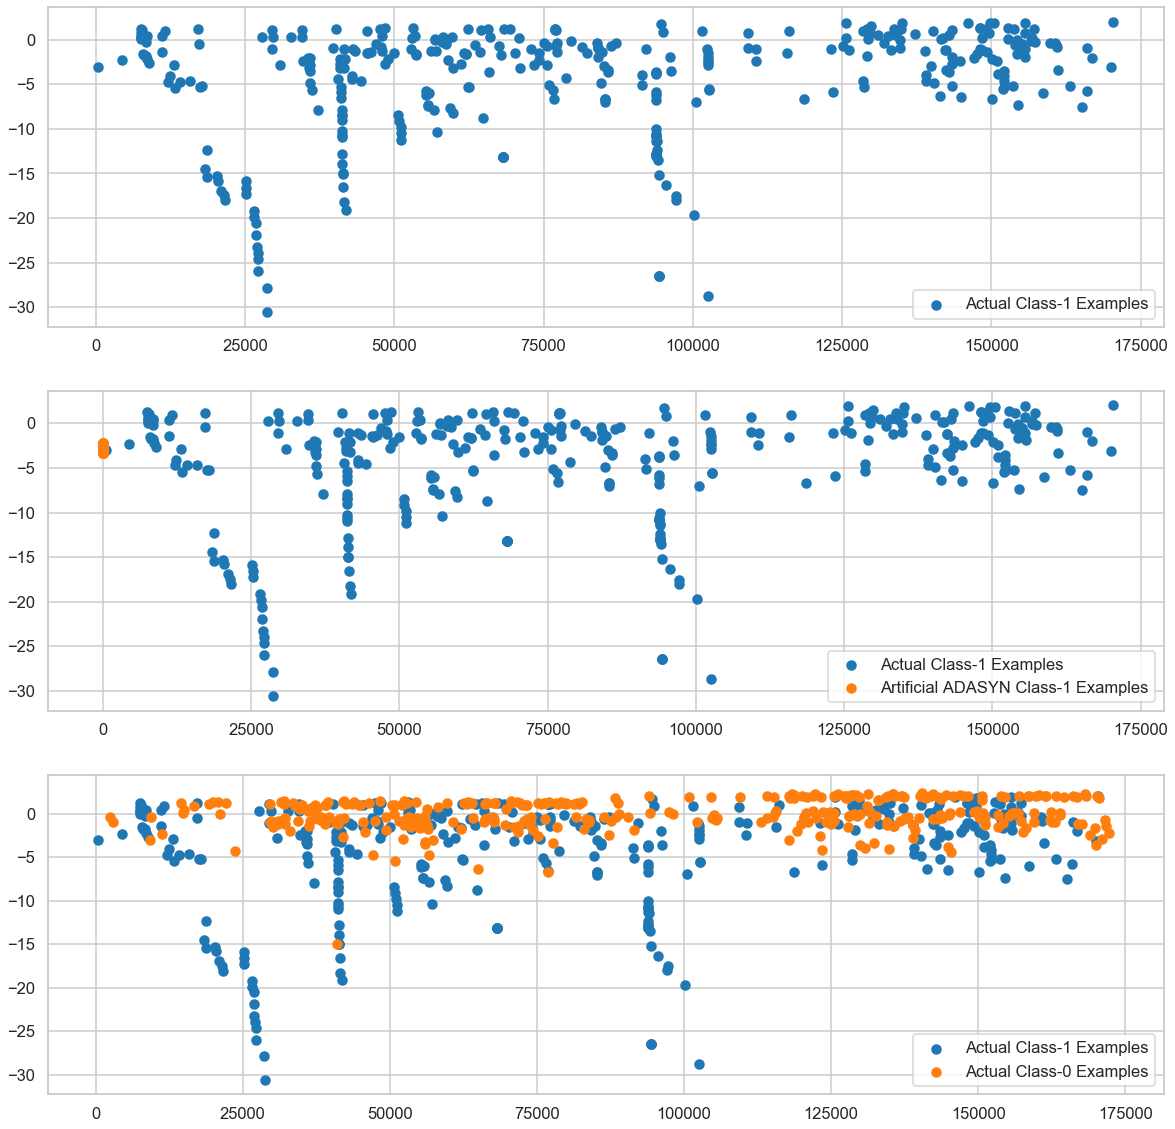

In [34]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train_pt, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [48]:
#Best Adasyn model

ada_final = over_sampling.ADASYN(random_state=0)
X_train_adasyn1, y_train_adasyn1 = ada_final.fit_resample(X_train, y_train)

xgb_adasyn_final = XGBClassifier(learning_rate= 0.5, max_depth = 6, min_child_weight= 6)

xgb_adasyn_final.fit(X_train_adasyn1,y_train_adasyn1)

xgb_adasyn_pred_final = xgb_adasyn_final.predict(X_test)

print("F1:",f1_score(y_test,xgb_adasyn_pred_final))
print("ROC_AUC_SCORE:",roc_auc_score(y_test,xgb_adasyn_pred_final))

F1: 0.8309859154929579
ROC_AUC_SCORE: 0.9273721148920879


### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

**I am selecting the oversamploing method call SMOTE as it gives the best result on a model in terms of F1 score and ROC AUC SCORE**

In [39]:
# perform the best oversampling method on X_train & y_train

clf = XGBClassifier(learning_rate= 0.5, max_depth = 6, min_child_weight= 4) #initialise the model with optimum hyperparameters
clf.fit(X_train_smote1, y_train_smote1) # fit on the balanced dataset

y_pred_final_mod = clf.predict(X_test_pt)

print('ROC_AUC_SCORE:',roc_auc_score(y_test,y_pred_final_mod)) #print the evaluation score on the X_test by choosing the best evaluation metric

ROC_AUC_SCORE: 0.9307901570579227


### Print the important features of the best model to understand the dataset

Top var = 15
2nd Top var = 5
3rd Top var = 9


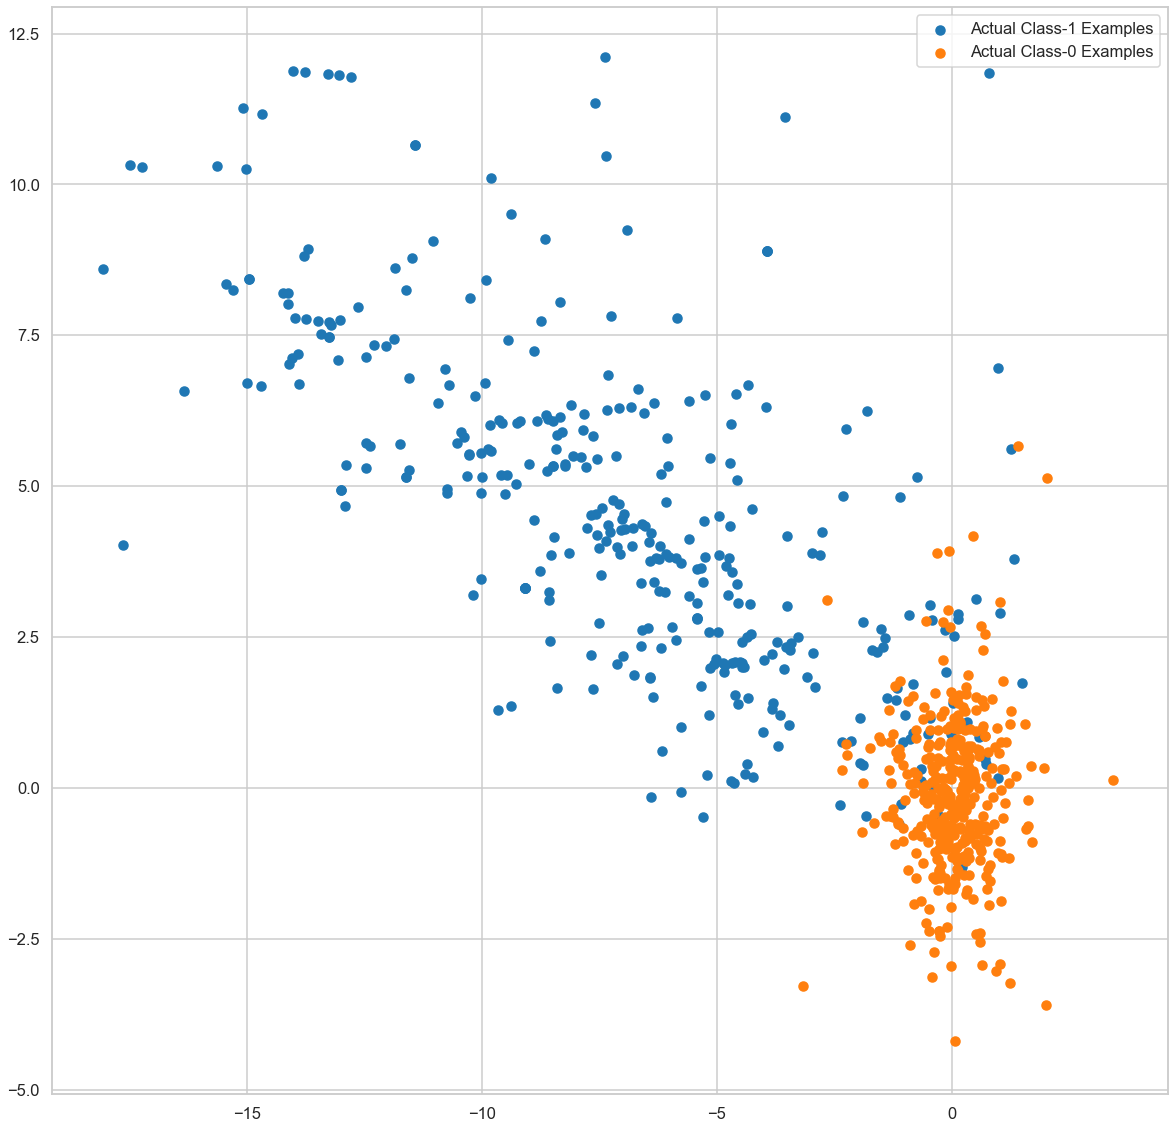

In [50]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train_pt.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_pt.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [120]:
# Finding the thresholds and checking the training score for auc score

y_predict = pd.DataFrame(clf.predict_proba(X_test_pt)[0:,1])

print('Train auc =', metrics.roc_auc_score(y_test,y_pred_final_mod))
fpr, tpr, thresholds = roc_curve(y_test,y_predict)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

In [136]:
# Calculating for threshold calcualtions

from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_test, y_predict)

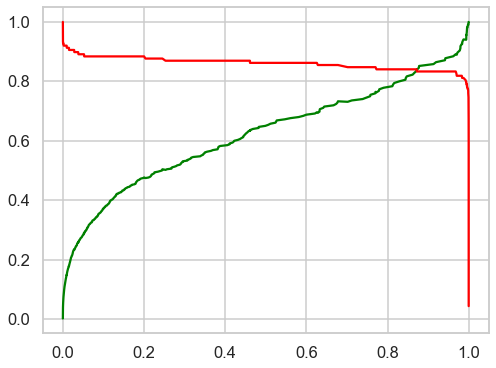

In [138]:
# Plotting the graph for trade off between precision and recall

plt.figure(figsize=(8,6))

plt.plot(thresholds, p[:-1], "g-",)
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [163]:
# Creating dataset for identifying threshold 

final_prob = pd.concat([pd.DataFrame(y_test).reset_index(),y_predict],1)


final_prob.columns = ['Index','Class','Class_pred_prob']

final_prob.head()

,Index,Class,Class_pred_prob
0,65918,0,1.412300e-06
1,114415,0,5.739309e-07
2,251942,0,2.011573e-06
3,249882,0,1.484685e-06
4,203702,0,1.869577e-06


In [165]:
# Finding optinall threshold

final_prob['final_predicted'] = final_prob.Class_pred_prob.map(lambda x: 1 if x > 0.86 else 0)

final_prob.head()

,Index,Class,Class_pred_prob,final_predicted
0,65918,0,1.412300e-06,0
1,114415,0,5.739309e-07,0
2,251942,0,2.011573e-06,0
3,249882,0,1.484685e-06,0
4,203702,0,1.869577e-06,0


In [170]:
# Final evaluation after finding optimal threshold

print("Accuracy:",metrics.accuracy_score(final_prob.Class,final_prob.final_predicted))
print("Recall:",metrics.recall_score(final_prob.Class,final_prob.final_predicted))
print("Precision:",metrics.precision_score(final_prob.Class,final_prob.final_predicted))
print("F1 Score:",metrics.f1_score(final_prob.Class,final_prob.final_predicted))

Accuracy: 0.9994499256814484
Recall: 0.8405797101449275
Precision: 0.8226950354609929
F1 Score: 0.8315412186379928
